# Slope pattern detection (line detection)

> Slope pattern detection can be very useful in the field of computer vision. It can be used to detect the road lines, monitor the moving elements (like vehicles). Below shows how to detect road lines (a slope pattern) with Canny's Edge detector and Hough Tranform methods.

The process of slope detection is:
- Change raw image to gray color 
- May need to apply smooth filter to remove the noise of the image
- Apply edge detector (like Canny's edge detector)
- Apply Hough Transform

First let us import required modules,

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

Now, let us load and plot the image. Here I also plot the image after smooth filter (Gaussion filter used), the purpose of it is to remove the noise which can affect the line detection.

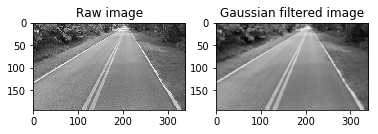

In [2]:
# raw image, gray scale
img = cv2.imread('road_line.png',0)
# filtered image
img2=np.array(img)
cv2.GaussianBlur(img,(5,5),0,img2,0)
# plot raw and filtered images
plt.figure(1)
plt.subplot(121)
plt.imshow(img,cmap='gray')
plt.title('Raw image')
plt.subplot(122)
plt.imshow(img2,cmap='gray')
plt.title('Gaussian filtered image')
plt.show()

Apply edge detector on the raw image, here Canny's edge detector is used (Canny's edge method uses a Sobel filter to obtain the gradient of the image before it thresholds to get the edges).

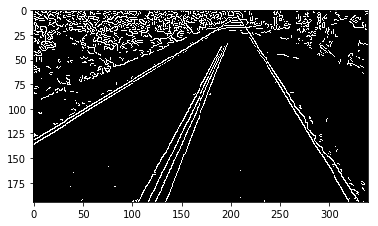

In [3]:
# edge detector on raw image
edges = cv2.Canny(img,150,200,apertureSize=3)
plt.figure(2)
plt.imshow(edges,cmap = 'gray')
plt.show()

We can see from the above figure that there are many edges detected on the top-left of the image. If we apply edge detector on smooth filtered image,

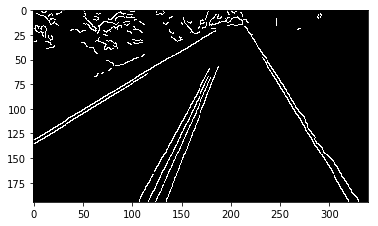

In [4]:
# edge detector on blurred image
edges = cv2.Canny(img2,150,200,apertureSize=3)
plt.figure(3)
plt.imshow(edges,cmap = 'gray')
plt.show()

Now we can see fewer edges on the top-left of the image. Usually a smooth filter is needed to remove noise on the image which can affect the line detection. Here we will use the filtered image for line detection. Hough Transform is a very useful technique to detect any simple or complicated slope patterns. For the details of Hough Transform algorithm, you can check it here (https://en.wikipedia.org/wiki/Hough_transform).

Now let us apply Hough Transform,

In [5]:
# Use Hough Transform for line detection
lines = cv2.HoughLines(edges,1,np.pi/180,80)

# set angle constraint for detected lines
min_angle=0
max_angle=1.2

R,Theta=[],[]
# draw detected lines
for line in lines:
    r,theta=line[0]
    R.append(r)
    Theta.append(theta)
    a,b=np.cos(theta),np.sin(theta)
    x0,y0=a*r,b*r
    x1=int(x0+1000*(-b))
    y1=int(y0+1000*(a))
    x2=int(x0-1000*(-b))
    y2=int(y0-1000*(a))
    # check if the angle of detected lines falls within (min_angle, max_angle)
    if min_angle<=theta<=max_angle or min_angle<=np.pi-theta<=max_angle:
        cv2.line(img2,(x1,y1),(x2,y2),(255,255,0),2)

Plot the detected lines (shown as white lines) in the image,

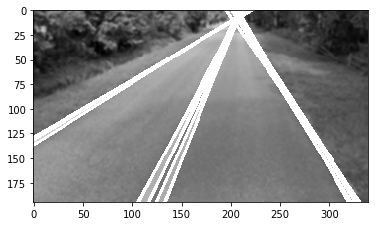

In [6]:
plt.figure(4)
plt.imshow(img2,cmap='gray')
plt.show()

Scatterplot of __(r, theta)__ for detected lines. Here __r__ is the distance from the line to the origin (top-left vertice), and __theta__ is the angle between x-axis and the line normal to the detected lines. 

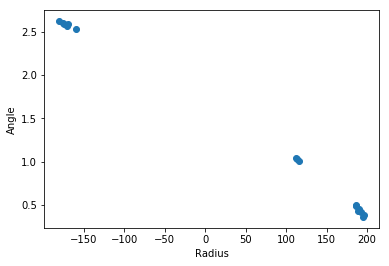

In [7]:
plt.figure(5)
plt.scatter(R,Theta)
plt.xlabel('Radius')
plt.ylabel('Angle')
plt.show()

Note that you can also cluster the points in the above figure to only one or few points, so that to show only few detected lines. 

In [9]:
#lines = cv2.HoughLinesP(edges,1,np.pi/180,80,minLineLength=100,maxLineGap=5)
#for line in lines:
#    x1,y1,x2,y2 = line[0]
#    cv2.line(img,(x1,y1),(x2,y2),(255,255,0),2)
#plt.imshow(img,cmap='gray')
#plt.show()